##Exploratory Data Analysis


In [28]:
# importing libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

In [29]:
# Loading DataSets
ds=load_dataset('lukebarousse/data_jobs')
df=ds['train'].to_pandas()

In [30]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [46]:
df['job_country'].value_counts().head()

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Name: count, dtype: int64

Filter out Data for the Data Analyst in usia

In [31]:
df_us=df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

In [32]:
def extract_city(location):
    if pd.isna(location):
        return None
    if location.lower()=='anywhere':
        return "Remote"
    if location.lower()=='remote':
        return "Remote"
    if location=="usia":
        return "Remote"
    parts=location.split(",")
    return ",".join(parts[0:2]).strip()

df_us['job_location']=df_us['job_location'].apply(extract_city)


In [33]:
# creating new DataFrame for the job locations and count
df_us_plot=df_us['job_location'].value_counts().head(8).to_frame().copy()

In [34]:
total=df_us_plot['count'].sum()
total

np.int64(20025)

Text(0, 0.5, '')

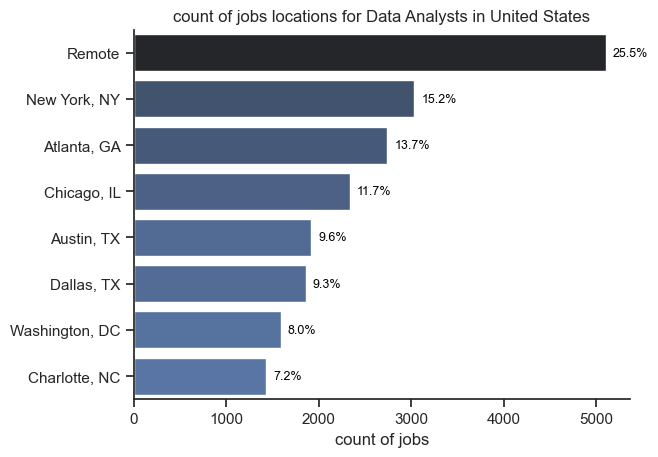

In [35]:
sns.set_theme(style='ticks')
ax=sns.barplot(data=df_us_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
for container in ax.containers:
    labels = [f'{p.get_width() / total * 100:.1f}%' for p in container.patches]
    ax.bar_label(container, labels=labels, fmt='%.1f%%', padding=5, color='black', fontsize=9)
sns.despine()
plt.title("count of jobs locations for Data Analysts in United States")
plt.xlabel("count of jobs")
plt.ylabel("")

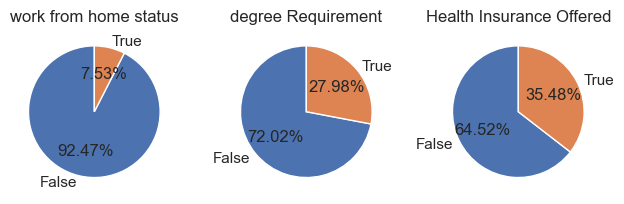

In [40]:
dict_col={
    'job_work_from_home':"work from home status",
    'job_no_degree_mention':'degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}

fig,ax=plt.subplots(1,3)

for i,(column,title) in enumerate(dict_col.items()):
    df_us[column].value_counts().plot(kind='pie',ax=ax[i],startangle=90,autopct='%.2f%%')
    ax[i].set_ylabel("")
    ax[i].set_title(title)
fig.tight_layout()

In [38]:
# creating new DataFrame for the companies and count
df_us_compny_plot=df_us['company_name'].value_counts().head(10).to_frame().copy()
total2=df_us_compny_plot['count'].sum()
total2

np.int64(5312)

Text(0, 0.5, '')

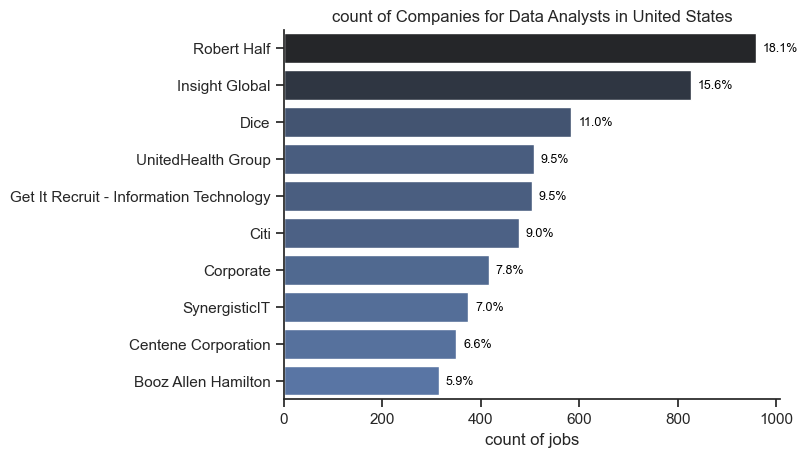

In [39]:
#

sns.set_theme(style='ticks')
ax=sns.barplot(data=df_us_compny_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
for container in ax.containers:
    labels = [f'{p.get_width() / total2 * 100:.1f}%' for p in container.patches]
    ax.bar_label(container, labels=labels, fmt='%.1f%%', padding=5, color='black', fontsize=9)
sns.despine()
plt.title("count of Companies for Data Analysts in United States")
plt.xlabel("count of jobs")
plt.ylabel("")